# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import time
import warnings
warnings.filterwarnings('ignore')

Dataset   Link: 
 
https://raw.githubusercontent.com/innomaticsresearchlab/Datasets/master/Datasets/So cial_Network_Ads.csv   


In   this   assignment   you   have   to   do   pre-processing,   EDA   and   apply 
 KNN/SVM/Ensemble   methods(Bagging,Boosting   algorithms)   classifier. 
 
· 
           
 Dependent   Variable :   Purchased 
 
· 
           
 Metrics :   Accuracy,   Precision,   Recall,   TPR. 
 
-  Task-1: 
 
  
 Train   your   model   using   KNN,SVM,Ensemble   methods(Bagging,Boosting   algorithms) 
 classifiers   and   display   all   classification   metrics . 
-   Task-2: 
 
Find   out   which   Model   performs   best   for   this   dataset. 
-   Task-3: 
 
Apply   GridSearchCV   and   find   out   the   best   parameters   for   each   algorithm. 
 
 

In [2]:
url=r'https://raw.githubusercontent.com/innomaticsresearchlab/Datasets/master/Datasets/Social_Network_Ads.csv'
data=pd.read_csv(url)

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


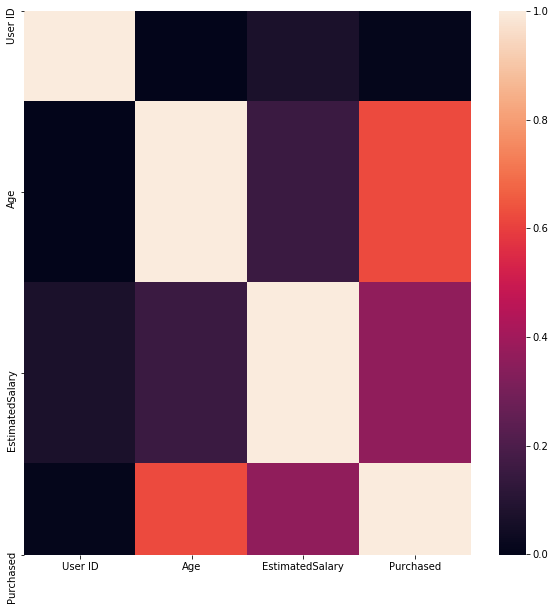

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

In [9]:
data.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [10]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Label Encoder: Converting Categorical columns to numerical values

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
Le=LabelEncoder()

In [13]:
data['Gender']=Le.fit_transform(data['Gender'])

In [14]:
data['Gender'].unique()

array([1, 0], dtype=int64)

### Outlier Treatment

In [15]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

In [16]:
print(IQR)

User ID            123599.25
Gender                  1.00
Age                    16.25
EstimatedSalary     45000.00
Purchased               1.00
dtype: float64


In [17]:
Min=Q1-1.5*IQR
Max=Q3+1.5*IQR
print((data<Min)|(data>Max))

     User ID  Gender    Age  EstimatedSalary  Purchased
0      False   False  False            False      False
1      False   False  False            False      False
2      False   False  False            False      False
3      False   False  False            False      False
4      False   False  False            False      False
..       ...     ...    ...              ...        ...
395    False   False  False            False      False
396    False   False  False            False      False
397    False   False  False            False      False
398    False   False  False            False      False
399    False   False  False            False      False

[400 rows x 5 columns]


In [18]:
data[(data<Min)|(data>Max)].sum()

User ID            0.0
Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

- From the above we can say that there are no outliers in the dataset

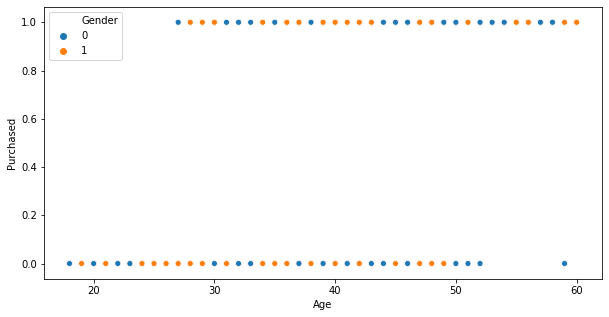

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(data['Age'],data['Purchased'],hue=data['Gender'])

In [20]:
data.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

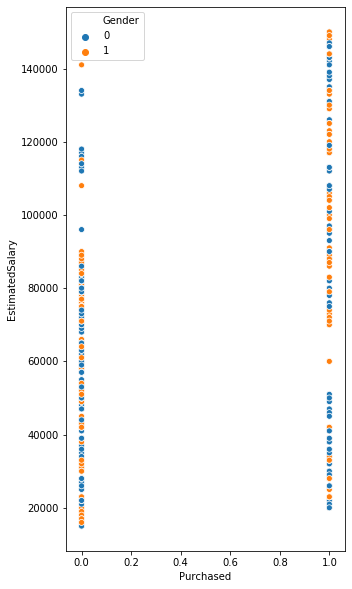

In [21]:
plt.figure(figsize=(5,10))
sns.scatterplot(y=data['EstimatedSalary'],x=data['Purchased'],hue=data['Gender'])

In [22]:
data.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [23]:
data['User ID'].shape

(400,)

In [24]:
data['Gender'].shape

(400,)

In [25]:
data['Age'].shape

(400,)

In [26]:
data['EstimatedSalary'].shape

(400,)

In [27]:
data['Purchased'].shape

(400,)

# Extracting feature and target

In [28]:
X=data.drop(columns=['Purchased'])
Y=data['Purchased']

In [29]:
X.shape,Y.shape

((400, 4), (400,))

### split the dataset into train and test 20%

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((320, 4), (80, 4), (320,), (80,))

# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,roc_auc_score,auc

In [32]:
knn=KNeighborsClassifier()

In [33]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [34]:
Y_train_pred=knn.predict(X_train)
Y_test_pred=knn.predict(X_test)
Y_train_pred_prob=knn.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=knn.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [35]:
print('-----------------Train--------------------------Test---------------')
print('Accuracy  score : {}                          {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}             {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}             {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train--------------------------Test---------------
Accuracy  score : 0.825                          0.7625
Precision score : 0.8125                         0.7
Recall Score    : 0.6724137931034483             0.5185185185185185
ROC_Auc_score   : 0.7920892494929006             0.7026554856743537


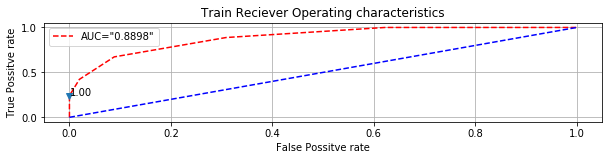

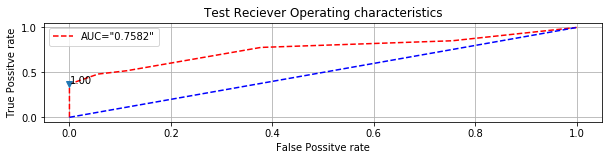

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()


# SVM

In [37]:
from sklearn.svm import SVC

In [38]:
svc=SVC(probability=True)

In [39]:
svc.fit(X_train,Y_train)

SVC(probability=True)

In [40]:
Y_train_pred=svc.predict(X_train)
Y_test_pred=svc.predict(X_test)
Y_train_pred_prob=svc.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=svc.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [41]:
print('-----------------Train-----------------------Test---------------')
print('Accuracy  score : {}                      {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}                         {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}                         {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train-----------------------Test---------------
Accuracy  score : 0.6375                      0.6625
Precision score : 0.0                         0.0
Recall Score    : 0.0                         0.0
ROC_Auc_score   : 0.5                         0.5


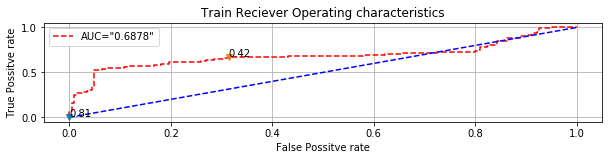

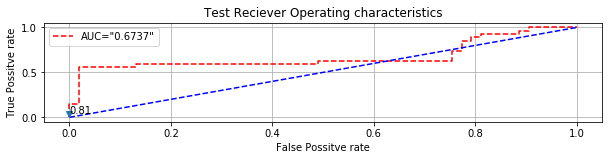

In [42]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()


# Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [44]:
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [45]:
Y_train_pred=RFC.predict(X_train)
Y_test_pred=RFC.predict(X_test)
Y_train_pred_prob=RFC.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=RFC.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [46]:
print('-----------------Train-----------------------Test---------------')
print('Accuracy  score : {}                         {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}                         {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}                         {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train-----------------------Test---------------
Accuracy  score : 1.0                         0.925
Precision score : 1.0                         0.8620689655172413
Recall Score    : 1.0                         0.9259259259259259
ROC_Auc_score   : 1.0                         0.9252271139063593


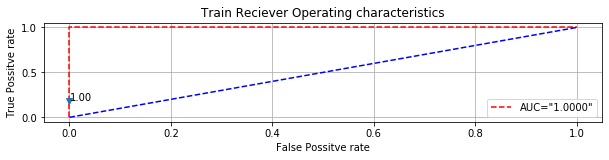

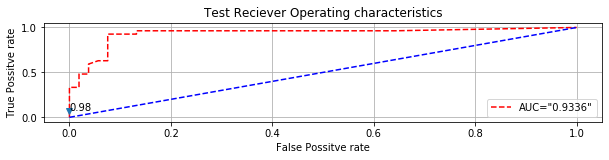

In [47]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()

# Gradient Boosting 

In [48]:
from xgboost import XGBClassifier

In [49]:
XGB=XGBClassifier()

In [50]:
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
Y_train_pred=XGB.predict(X_train)
Y_test_pred=XGB.predict(X_test)
Y_train_pred_prob=XGB.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=XGB.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [52]:
print('-----------------Train-----------------------Test---------------')
print('Accuracy  score : {}                         {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}                         {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}                         {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train-----------------------Test---------------
Accuracy  score : 1.0                         0.9125
Precision score : 1.0                         0.8571428571428571
Recall Score    : 1.0                         0.8888888888888888
ROC_Auc_score   : 1.0                         0.9067085953878407


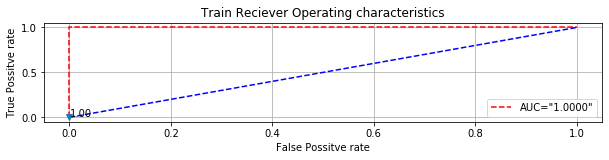

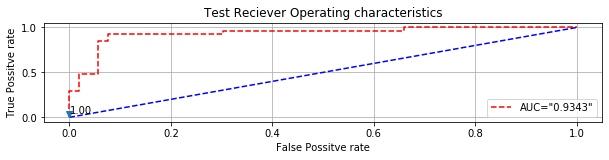

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()

# Task-2


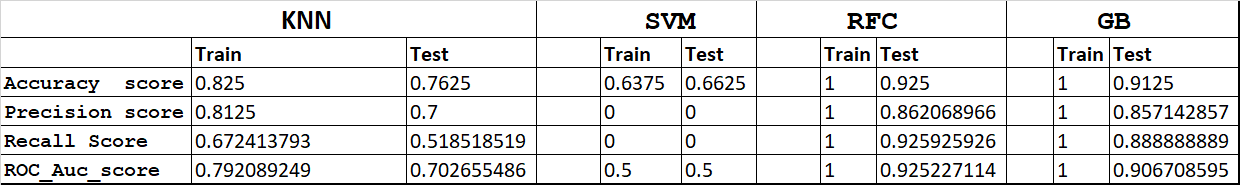

                         KNN                SVM  			     RFC			        GB		
                Train	    Test		Train	Test		Train	Test		    Train	Test
Accuracy  score	0.825	    0.7625		0.6375	0.6625		1	    0.925		    1	0.9125
Precision score	0.8125	    0.7	        0	    0		    1	    0.862068966		1	0.857142857
Recall Score	0.672413793	0.518518519	0	    0		    1	    0.925925926		1	0.888888889
ROC_Auc_score	0.792089249	0.702655486	0.5	    0.5		    1	    0.925227114		1	0.906708595


- From the above we can say the Random Forest classifier and Gradient boost classifier are performing well

# Task 3

## Using Random Forest Classifier

In [54]:
parameters={'n_estimators':[10,20,50,100],
            'criterion':['gini','entropy'],
            'max_features':[1,2,3]
            
           }

In [55]:
model=RandomForestClassifier()

In [56]:
from sklearn.model_selection import GridSearchCV
import time

In [57]:
GS=GridSearchCV(model,param_grid=parameters)

In [58]:
start=time.time()
GS.fit(X_train,Y_train)
end =time.time()
print('time taken to execute=',end-start)

time taken to execute= 13.204500436782837


In [59]:
GS.best_params_

{'criterion': 'gini', 'max_features': 1, 'n_estimators': 50}

In [60]:
## Using 

In [74]:
model_xgb=XGBClassifier()

In [76]:
GSxgb=GridSearchCV(model_xgb,param_grid=parameters)

In [77]:
start=time.time()
GSxgb.fit(X_train,Y_train)
end =time.time()
print('time taken to execute=',end-start)

[11:45:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to so


[11:45:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to s


[11:45:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to s

[11:45:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to so

[11:45:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to so

[11:45:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to so

In [78]:
GSxgb.best_params_

{'criterion': 'gini', 'max_features': 1, 'n_estimators': 20}

## From the above RFC and XGB we can see that criterion is `gini` and max-features=`1`